In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Something About The Data

In [3]:
info=['age','1:male,0:female','chest pain type,1:typical angina,2:atypical angina,3:non-anginal pain,4:asymptomatic','reting blood pressure','serum cholesterol measurement in mg/dl','fasting blood sugar > 120 mg/dl','resting electrocardiographic results(value 0,1,2)','maximum heart rate achieved','exercise induced angina(1=yes;0=no)','ST depression induced by exercise relative to rest','the slope of the peak exercise ST segment','number of major vessels(0-3)','a blood disorder called thalassemia(3=normal;6=fixed defect;7=reversable defect)','Heart disease(0=no,1=yes)']
for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1:male,0:female
cp:			chest pain type,1:typical angina,2:atypical angina,3:non-anginal pain,4:asymptomatic
trestbps:			reting blood pressure
chol:			serum cholesterol measurement in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results(value 0,1,2)
thalach:			maximum heart rate achieved
exang:			exercise induced angina(1=yes;0=no)
oldpeak:			ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels(0-3)
thal:			a blood disorder called thalassemia(3=normal;6=fixed defect;7=reversable defect)
target:			Heart disease(0=no,1=yes)


In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Missing Value

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Checking the distribution of Target variables.(1-defective Heart,0-Healthy Heart)
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
# firstly we will make a copy of our original dataset to perform further actions
data_to_use = data.copy()

# Visualising Numeric Variables.

#  Let's make a pairplot of all the numeric variables.

#  Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

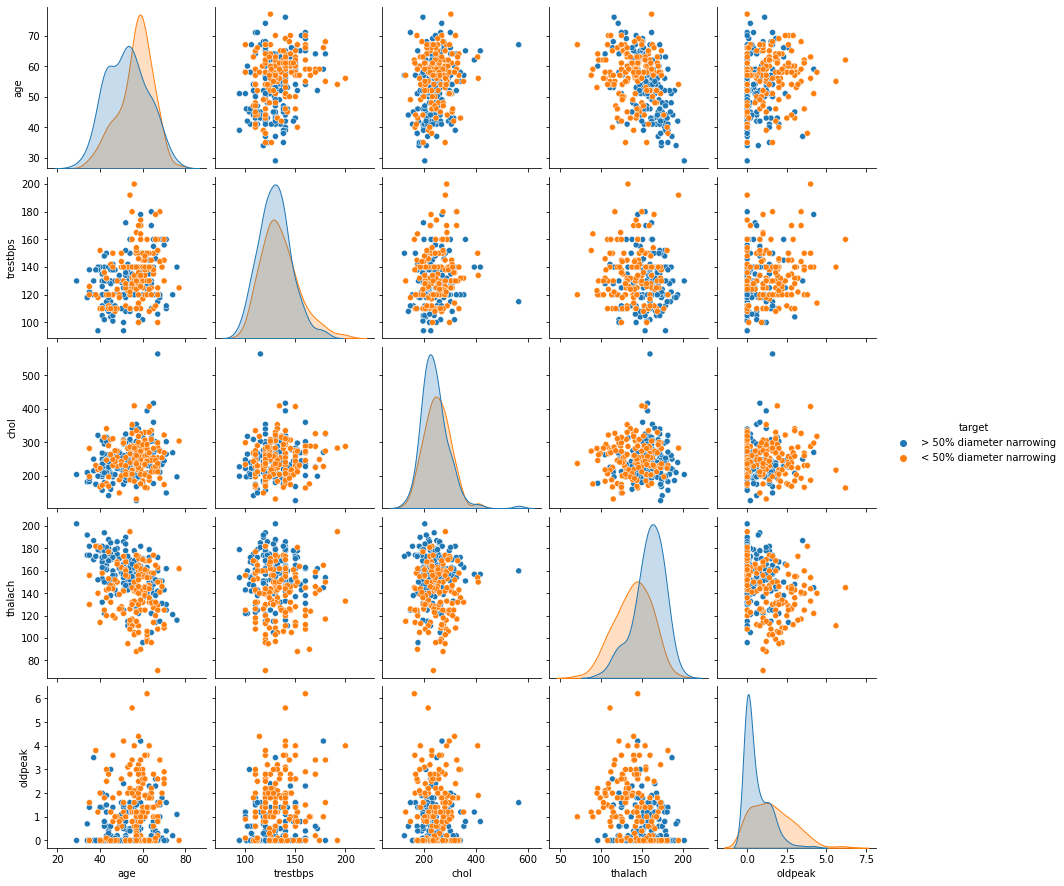

In [11]:
# Visualizing the 
cont_data = data_to_use[["age","trestbps","chol","thalach","oldpeak","target"]].copy()
cont_data['target'] = cont_data['target'].replace({0: '< 50% diameter narrowing', 1: '> 50% diameter narrowing'})

sns.pairplot(cont_data ,hue = "target" )
plt.show()

# Let's make a heatmap of all the numeric variables.

* Heatmap is also used to understand the best set of features to explain a relationship between two variables.

* It is usually not used that much in drawing any final conclusion but a great way to visualize the relation between features   by looking at different color representation of them.

* The heatmap shows the relative intensity of values captured by your eye tracker by assigning each value a color representation.

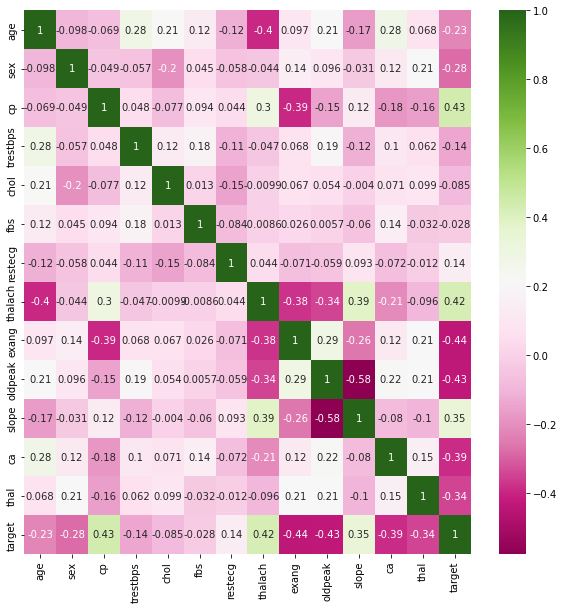

In [12]:
corr=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='PiYG')
plt.show()

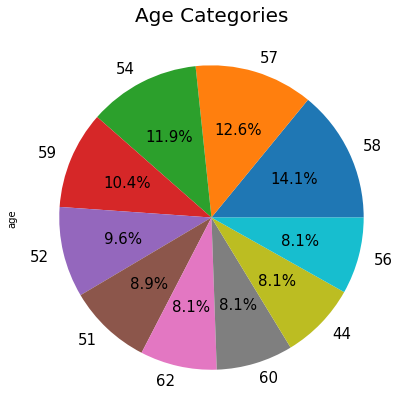

In [13]:
plt.figure(figsize=(7,7))
df = data.age.value_counts().to_frame()
textprops = {"fontsize":15}
df.head(10).age.plot(kind='pie',autopct='%1.1f%%',textprops =textprops )

plt.title("Age Categories",fontsize = 20)
plt.show()

In [14]:
# Splitting the Features and Target.
x=data.drop(columns='target',axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [15]:
y=data['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [16]:
#splitting the data into Training data and Test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30,shuffle=True)

In [17]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


In [18]:
# Model Training
model=LogisticRegression()

In [19]:
# Training the LogisticRegression model with the Training data
model.fit(x_train,y_train)

C:\Users\ABDUL HAKEEM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
model.predict([[37,1,2,130,250,0,1,187,0,3.5,0,0,2]])

array([1], dtype=int64)

In [21]:
model.predict([[68,1,0,144,193,1,1,141,0,3.4,1,2,3]])

array([0], dtype=int64)

In [22]:
model.score(x_train,y_train)

0.8636363636363636

In [23]:
import pickle
with open('pickle_model','wb')as f:
    pickle.dump(model,f)    

In [24]:
with open('pickle_model','rb')as d:
    model=pickle.load(d)